In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

### Intro to Simple Linear Regression

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


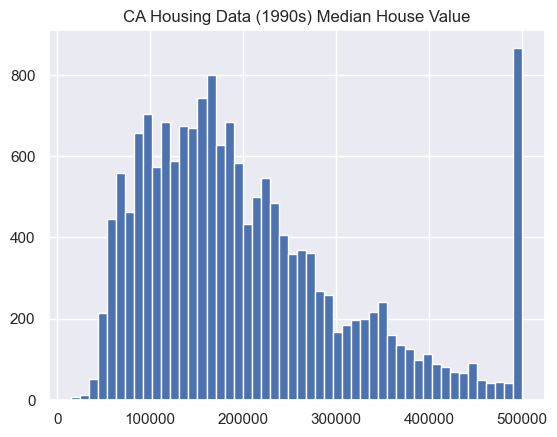

In [11]:
# Load the 1990s California Housing dataset as a Pandas dataframe.
# For details, see https://developers.google.com/machine-learning/crash-course/california-housing-data-description.
# Note that each example (row) in this dataset describes a neighborhood.
ca_housing_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')

# Show the first few rows
display(ca_housing_df.head())

# Show summary statistics for the data
display(ca_housing_df.describe())

# Plot a histogram of the median house values
plt.hist(ca_housing_df['median_house_value'], bins=50)
plt.title('CA Housing Data (1990s) Median House Value')
plt.show()

### Intro to Tensorflow and Keras
TensorFlow is a large and complex library, including many constantly evolving functions and APIs (Keras is one set of convenient APIs inside TensorFlow). This means you'll want to learn how to use the documentation and the high-level ideas that guide its design.

The trickiest thing to understand about TensorFlow is the primary way in which it differs from standard programming. In a typical program, each line of code is executed sequentially. In TensorFlow, by contrast, you first define a computation graph. The graph specifies how data flows from input to output. However, no computation actually happens until data is passed into the graph and execution begins.

2024-01-30 09:25:31.444637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
957/957 [==============================] - 2s 2ms/step - loss: 1.1838 - val_loss: 1.0859
Epoch 2/5
957/957 [==============================] - 1s 1ms/step - loss: 0.9520 - val_loss: 0.8503
Epoch 3/5
957/957 [==============================] - 2s 2ms/step - loss: 0.7764 - val_loss: 0.6898
Epoch 4/5
957/957 [==============================] - 2s 2ms/step - loss: 0.6635 - val_loss: 0.5990
Epoch 5/5
532/532 [==============================] - 1s 1ms/step


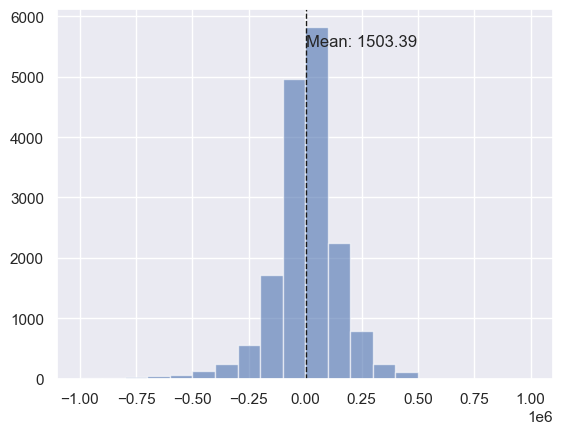

In [12]:
import tensorflow as tf
from tensorflow import keras

# Column names to use as input features.
features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income']

# Apply log transforms to input features and output values.
X = np.log(ca_housing_df[features])
Y = np.log(ca_housing_df['median_house_value'])

def build_model(num_features):
  """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = keras.Sequential() # The Keras Sequential API allows for linear stacking of layers, making it easy to build models layer by layer. 
  model.add(keras.layers.Dense( # Add a Dense (fully connected) layer to the model.
      input_shape=[num_features], # each input has num_features features
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean absolute error as our loss and the Adam optimizer.
  model.compile(loss='mae', optimizer='Adam')
  return model

# Build a model and train it. Hold out 10% of data for validation.
model = build_model(num_features=len(features))
model.fit(x=X, y=Y,
          validation_split=0.1, batch_size=16, epochs=5)

# Use the model to predict the training labels.
Y_pred = model.predict(x=X).flatten()

# Compute training data errors by converting back from the log scale.
error = np.exp(Y) - np.exp(Y_pred)
mean_error = error.mean()

# Plot an error histogram.
plt.hist(error, bins=20, range=(-1e6, 1e6), alpha=0.6)

# Also show the average error explicitly in the same plot.
plt.axvline(mean_error, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_error, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_error))
plt.show()